In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import accuracy_score
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import MaxAbsScaler
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree     import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics         import classification_report

In [6]:
df = pd.read_csv("C:/Users/ISD/Python_ali/fault_detection/jupyter/Pv_Data3.csv")
df;
X = df.drop(['Target','I1','I2','I3','I4','I5','I6','I7','I8'],axis=1).values
X1= df.drop(['Target','Voc','Isc','Vmp','Imp','Pmp','T','G'],axis=1).values
Y=df.drop(['Voc','Isc','Vmp','Imp','Pmp','T','G','I1','I2','I3','I4','I5','I6','I7','I8'],axis=1).values
X.shape

(1600, 7)

In [7]:
pca = PCA(n_components=7)

In [8]:
pca.fit(X)

PCA(n_components=7)

In [9]:
X_pca = pca.transform(X)

In [10]:
trainX, testX,trainY,testY = train_test_split(X_pca ,Y, test_size=0.2, random_state=0)

In [11]:
sc=StandardScaler()

scaler = sc.fit(trainX)
scaler = sc.fit(testX)
trainX = scaler.transform(trainX)
testX  = scaler.transform(testX)

In [12]:
 X1 = preprocessing.normalize(X1, norm='l2')

In [13]:
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),n_estimators=120, random_state = 0)

In [14]:
model.fit(trainX,np.ravel(trainY))

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   n_estimators=120, random_state=0)

In [15]:
ypred=model.predict(trainX)
ypred

array([ 9,  2, 10, ...,  2,  3,  8], dtype=int64)

In [16]:
c=accuracy_score(trainY,ypred)*100
c

99.375

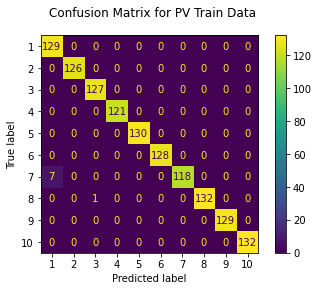

In [17]:
fig = plot_confusion_matrix(model,trainX,trainY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Train Data")
plt.show()

In [18]:
ypred1=model.predict(testX)

In [19]:
c1=accuracy_score(testY,ypred1)*100
c1

95.0

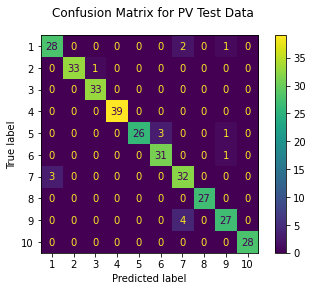

In [16]:
fig = plot_confusion_matrix(model,testX,testY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Test Data")
plt.show()

In [24]:
YP = np.concatenate((ypred,ypred1), axis=0)
Xo=np.concatenate((trainX,testX),axis=0)
YR=np.concatenate((trainY,testY),axis=0)

In [25]:
ac2=accuracy_score(YR,YP)*100
ac2

98.5

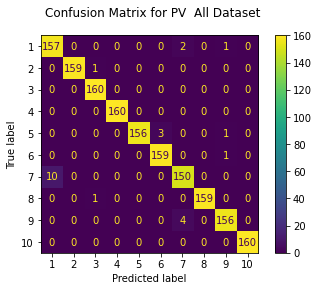

In [26]:
fig = plot_confusion_matrix(model,Xo,YR, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV  All Dataset")
plt.show()


In [22]:
cr=classification_report(YR,YP)
cr

'              precision    recall  f1-score   support\n\n           1       0.94      0.98      0.96       160\n           2       1.00      0.99      1.00       160\n           3       0.99      1.00      0.99       160\n           4       1.00      1.00      1.00       160\n           5       1.00      0.97      0.99       160\n           6       0.98      0.99      0.99       160\n           7       0.96      0.94      0.95       160\n           8       1.00      0.99      1.00       160\n           9       0.98      0.97      0.98       160\n          10       1.00      1.00      1.00       160\n\n    accuracy                           0.98      1600\n   macro avg       0.99      0.98      0.99      1600\nweighted avg       0.99      0.98      0.99      1600\n'

In [23]:
matrix = confusion_matrix(YR,YP)
matrix.diagonal()/matrix.sum(axis=1)

array([0.98125, 0.99375, 1.     , 1.     , 0.975  , 0.99375, 0.9375 ,
       0.99375, 0.975  , 1.     ])

In [86]:
X1=np.concatenate((Y,X1),axis=1)

In [87]:
s1=0
n1=[]
r1=[]
r=[]
n=[]
for i in range(1600):
    if X1[i,0]==1:
        n1.append(i+2)
        print(i+2,' ',0)
        r1.append(0)
        s1+=1
print('s1=  ',s1)
n.extend(n1)
r.extend(r1)
c1=1*np.ones(160)

5   0
60   0
62   0
67   0
68   0
77   0
90   0
114   0
129   0
133   0
135   0
155   0
157   0
160   0
191   0
199   0
208   0
228   0
232   0
255   0
264   0
270   0
286   0
325   0
326   0
327   0
333   0
335   0
337   0
341   0
352   0
367   0
375   0
376   0
388   0
394   0
406   0
407   0
408   0
414   0
424   0
447   0
458   0
461   0
462   0
479   0
481   0
484   0
493   0
514   0
534   0
536   0
549   0
566   0
567   0
568   0
588   0
601   0
605   0
608   0
610   0
622   0
634   0
635   0
638   0
639   0
642   0
654   0
665   0
715   0
717   0
734   0
735   0
742   0
753   0
771   0
789   0
796   0
797   0
801   0
809   0
819   0
832   0
862   0
893   0
909   0
912   0
913   0
916   0
940   0
948   0
950   0
955   0
959   0
964   0
990   0
995   0
1018   0
1029   0
1030   0
1045   0
1060   0
1068   0
1091   0
1098   0
1108   0
1113   0
1116   0
1121   0
1131   0
1139   0
1141   0
1143   0
1147   0
1167   0
1179   0
1180   0
1192   0
1200   0
1212   0
1228   0
1257   0
1266   

In [88]:
s2=0
n2=[]
r2=[]
t2=()
for i in range(1600):
    if X1[i,0]==2:
        n2.append(i+2)
        for j in range(1,9):
            if (abs(X1[i,j]-sum(X1[i,1:])/8))>0.11881:
                t2=t2+(j,)
        print(i+2,' ',t2)
        r2.append(t2)
        s2+=1
        t2=()

print('s2=',s2)
n.extend(n2)
r.extend(r2)
c2=2*np.ones(160)
r2

10   (7, 8)
35   (3, 4)
50   (6,)
69   (1, 2)
80   (6,)
92   (2, 3)
117   (6,)
118   (7, 8)
121   (5, 6)
123   (5, 6)
136   (3, 4)
148   (6,)
164   (7, 8)
177   (1, 2)
192   (1, 2)
197   (6,)
201   (7, 8)
211   (6,)
218   (7, 8)
219   (4, 5)
224   (7, 8)
227   (6,)
257   (5, 6)
259   (7, 8)
260   (2, 3)
280   (5, 6)
285   (4,)
292   (6,)
305   (6,)
306   (7, 8)
307   (5, 6)
316   (7, 8)
322   (3, 4)
330   (7, 8)
340   (1, 2)
349   (1, 2)
364   (4,)
398   (2, 3)
399   (1, 2)
416   (2, 3)
423   (3, 4)
432   (6,)
436   (3, 4)
440   (4, 5)
442   (7, 8)
445   (6,)
451   (3, 4)
452   (7, 8)
457   (2, 3)
471   (4,)
477   (3, 4)
483   (3, 4)
491   (5, 6)
501   (5, 6)
512   (7, 8)
513   (3, 4)
516   (7, 8)
532   (2, 3)
535   (4,)
537   (2, 3)
563   (7, 8)
574   (5, 6)
582   (5, 6)
591   (2, 3)
594   (2, 3)
606   (5, 6)
615   (4, 5)
669   (1, 2)
680   (6,)
684   (7, 8)
689   (2, 3)
712   (4, 5)
733   (3, 4)
738   (3, 4)
740   (6,)
741   (4, 5)
743   (5, 6)
756   (7, 8)
759   (1, 2)
764   (4, 5)


[(7, 8),
 (3, 4),
 (6,),
 (1, 2),
 (6,),
 (2, 3),
 (6,),
 (7, 8),
 (5, 6),
 (5, 6),
 (3, 4),
 (6,),
 (7, 8),
 (1, 2),
 (1, 2),
 (6,),
 (7, 8),
 (6,),
 (7, 8),
 (4, 5),
 (7, 8),
 (6,),
 (5, 6),
 (7, 8),
 (2, 3),
 (5, 6),
 (4,),
 (6,),
 (6,),
 (7, 8),
 (5, 6),
 (7, 8),
 (3, 4),
 (7, 8),
 (1, 2),
 (1, 2),
 (4,),
 (2, 3),
 (1, 2),
 (2, 3),
 (3, 4),
 (6,),
 (3, 4),
 (4, 5),
 (7, 8),
 (6,),
 (3, 4),
 (7, 8),
 (2, 3),
 (4,),
 (3, 4),
 (3, 4),
 (5, 6),
 (5, 6),
 (7, 8),
 (3, 4),
 (7, 8),
 (2, 3),
 (4,),
 (2, 3),
 (7, 8),
 (5, 6),
 (5, 6),
 (2, 3),
 (2, 3),
 (5, 6),
 (4, 5),
 (1, 2),
 (6,),
 (7, 8),
 (2, 3),
 (4, 5),
 (3, 4),
 (3, 4),
 (6,),
 (4, 5),
 (5, 6),
 (7, 8),
 (1, 2),
 (4, 5),
 (4, 5),
 (6,),
 (4, 5),
 (6,),
 (2, 3),
 (4,),
 (1, 2),
 (6,),
 (1, 2),
 (2, 3),
 (7, 8),
 (4, 5),
 (3, 4),
 (5, 6),
 (7, 8),
 (2, 3),
 (1, 2),
 (2, 3),
 (6,),
 (6,),
 (7, 8),
 (1, 2),
 (7, 8),
 (4, 5),
 (5, 6),
 (5, 6),
 (4,),
 (3, 4),
 (2, 3),
 (6,),
 (7, 8),
 (4, 5),
 (4,),
 (7, 8),
 (5, 6),
 (3, 4),
 (2, 3),

In [89]:
s3=0
n3=[]
r3=[]

for i in range(1600):
    if X1[i,0]==3:
        n3.append(i+2)
        for j in range(1,9):
            if (abs(X1[i,j]-sum(X1[i,1:])/8))>0.3:
                print(i+2,' ',j)
                r3.append(j)
                s3+=1
print('s3=  ',s3)
n.extend(n3)
r.extend(r3)
c3=3*np.ones(160)
r3

15   1
20   1
28   2
48   8
52   2
59   3
71   5
79   5
81   4
83   7
84   6
98   6
103   8
119   3
144   7
145   4
154   4
159   7
163   4
170   2
172   1
184   3
185   8
189   8
195   6
198   6
217   5
231   3
234   2
239   8
274   6
309   5
310   2
311   7
312   2
320   5
339   6
343   2
359   2
366   4
370   1
374   6
413   6
421   2
433   1
453   4
460   5
467   3
472   4
473   8
508   2
525   5
540   7
552   6
558   4
561   7
580   7
581   6
583   8
586   2
599   5
602   5
621   7
650   6
671   3
674   1
691   8
711   5
716   7
720   7
731   2
736   4
739   4
750   8
755   3
758   3
761   2
783   3
788   8
795   4
804   5
810   7
847   5
853   1
868   7
881   3
888   2
891   3
898   6
905   8
911   1
921   7
922   4
925   3
942   4
957   7
962   5
965   7
967   6
980   5
989   3
1000   3
1012   1
1014   2
1019   7
1022   8
1055   4
1059   8
1061   6
1066   4
1095   5
1096   3
1119   1
1120   5
1140   1
1155   3
1162   5
1166   3
1188   7
1191   8
1194   2
1201   1
1209   1
1214  

[1,
 1,
 2,
 8,
 2,
 3,
 5,
 5,
 4,
 7,
 6,
 6,
 8,
 3,
 7,
 4,
 4,
 7,
 4,
 2,
 1,
 3,
 8,
 8,
 6,
 6,
 5,
 3,
 2,
 8,
 6,
 5,
 2,
 7,
 2,
 5,
 6,
 2,
 2,
 4,
 1,
 6,
 6,
 2,
 1,
 4,
 5,
 3,
 4,
 8,
 2,
 5,
 7,
 6,
 4,
 7,
 7,
 6,
 8,
 2,
 5,
 5,
 7,
 6,
 3,
 1,
 8,
 5,
 7,
 7,
 2,
 4,
 4,
 8,
 3,
 3,
 2,
 3,
 8,
 4,
 5,
 7,
 5,
 1,
 7,
 3,
 2,
 3,
 6,
 8,
 1,
 7,
 4,
 3,
 4,
 7,
 5,
 7,
 6,
 5,
 3,
 3,
 1,
 2,
 7,
 8,
 4,
 8,
 6,
 4,
 5,
 3,
 1,
 5,
 1,
 3,
 5,
 3,
 7,
 8,
 2,
 1,
 1,
 4,
 1,
 2,
 7,
 8,
 4,
 1,
 7,
 1,
 8,
 7,
 3,
 6,
 8,
 8,
 2,
 2,
 6,
 6,
 5,
 4,
 1,
 2,
 1,
 3,
 8,
 6,
 1,
 4,
 8,
 5,
 3,
 6,
 4,
 6,
 5,
 1]

In [90]:
s4=0
n4=[]
r4=[]

for i in range(1600):
    if X1[i,0]==4:
        n4.append(i+2)
        for j in range(1,9):
            if (abs(X1[i,j]-sum(X1[i,1:])/8))>0.3:
                print(i+2,' ',j)
                r4.append(j)
                s4+=1
print('s4=  ',s4)

n.extend(n4)
r.extend(r4)
c4=4*np.ones(160)
r4

12   3
17   1
19   4
24   4
25   4
33   4
51   1
57   5
58   8
87   2
89   5
95   4
125   6
127   7
132   4
149   4
152   2
162   3
168   1
178   8
179   3
188   4
200   5
213   6
235   3
252   8
268   1
277   7
281   6
296   2
298   5
301   5
321   4
334   7
342   6
353   7
355   8
356   4
362   4
382   1
393   4
401   1
426   5
435   5
448   8
459   5
466   6
495   4
496   4
500   8
507   1
509   3
510   2
518   8
521   5
526   7
539   5
546   6
578   4
590   7
616   8
624   6
633   3
640   6
644   8
648   6
649   1
657   6
679   6
683   2
687   8
697   7
700   5
728   2
745   3
746   4
748   2
765   8
790   2
806   3
807   3
812   5
817   4
820   6
829   7
835   2
841   2
848   1
858   2
859   3
869   8
870   5
887   3
908   5
918   2
938   3
941   4
943   7
956   1
975   5
976   7
981   2
987   1
988   7
994   2
1015   4
1037   1
1058   7
1062   1
1074   8
1077   3
1078   5
1087   7
1088   3
1093   1
1094   3
1099   7
1100   8
1114   1
1126   1
1130   7
1148   6
1170   5
1197   1
1

[3,
 1,
 4,
 4,
 4,
 4,
 1,
 5,
 8,
 2,
 5,
 4,
 6,
 7,
 4,
 4,
 2,
 3,
 1,
 8,
 3,
 4,
 5,
 6,
 3,
 8,
 1,
 7,
 6,
 2,
 5,
 5,
 4,
 7,
 6,
 7,
 8,
 4,
 4,
 1,
 4,
 1,
 5,
 5,
 8,
 5,
 6,
 4,
 4,
 8,
 1,
 3,
 2,
 8,
 5,
 7,
 5,
 6,
 4,
 7,
 8,
 6,
 3,
 6,
 8,
 6,
 1,
 6,
 6,
 2,
 8,
 7,
 5,
 2,
 3,
 4,
 2,
 8,
 2,
 3,
 3,
 5,
 4,
 6,
 7,
 2,
 2,
 1,
 2,
 3,
 8,
 5,
 3,
 5,
 2,
 3,
 4,
 7,
 1,
 5,
 7,
 2,
 1,
 7,
 2,
 4,
 1,
 7,
 1,
 8,
 3,
 5,
 7,
 3,
 1,
 3,
 7,
 8,
 1,
 1,
 7,
 6,
 5,
 1,
 8,
 3,
 7,
 2,
 8,
 1,
 8,
 5,
 5,
 2,
 6,
 1,
 2,
 3,
 1,
 6,
 8,
 8,
 3,
 6,
 2,
 6,
 6,
 3,
 7,
 7,
 7,
 8,
 3,
 4,
 6,
 6,
 7,
 2,
 5,
 2]

In [ ]:
s5=0
n5=[]
r5=[]

for i in range(1600):
    if X1[i,0]==5:
        n5.append(i+2)
        for j in range(1,9):
            if (abs(X1[i,j]-sum(X1[i,1:])/8))>0.003:
                print(i+2,' ',j)
                r5.append(j)
                s5+=1
print('s5=  ',s5)
n.extend(n5)
r.extend(r5)
c5=5*np.ones(160)
r5

In [ ]:
s6=0
n6=[]
r6=[]

for i in range(1600):
    if X1[i,0]==6:
        n6.append(i+2)
        for j in range(1,9):
            if (abs(X1[i,j]-sum(X1[i,1:])/8))>0.1:
                print(i+2,' ',j)
                r6.append(j)
                s6+=1
print('s6=  ',s6)
n.extend(n6)
r.extend(r6)
c6=6*np.ones(160)
r6

In [ ]:
s7=0
n7=[]
r7=[]

for i in range(1600):
    if X1[i,0]==7:
        n7.append(i+2)
        for j in range(1,9):
            if (abs(X1[i,j]-sum(X1[i,1:])/8))>0.2:
                print(i+2,' ',j)
                r7.append(j)
                s7+=1
print('s7=  ',s7)
n.extend(n7)
r.extend(r7)
c7=7*np.ones(160)
r7

In [ ]:
s8=0
n8=[]
r8=[]

for i in range(1600):
    if X1[i,0]==8:
        n8.append(i+2)
        for j in range(1,9):
            if (abs(X1[i,j]-sum(X1[i,1:])/8))>0.7:
                print(i+2,' ',j)
                r8.append(j)
                s8+=1
print('s8=  ',s8)
n.extend(n8)
r.extend(r8)
c8=8*np.ones(160)
r8

In [ ]:
s9=0
n9=[]
r9=[]

for i in range(1600):
    if X1[i,0]==9:
        n9.append(i+2)
        for j in range(1,9):
            if (abs(X1[i,j]-sum(X1[i,1:])/8))>0.005872:
                print(i+2,' ',j)
                r9.append(j)
                s9+=1
print('s9=  ',s9)
n.extend(n9)
r.extend(r9)
c9=9*np.ones(160)
r9

In [ ]:
s10=0
n10=[]
r10=list()
t10=()
for i in range(1600):
    if X1[i,0]==10:
        n10.append(i+2)
        for j in range(1,9):
            if (abs(X1[i,j]-sum(X1[i,1:])/8))>0.306:
                t10=t10+(j,)
        print(i+2,' ',t10)
        r10.append(t10)
        s10+=1
        t10=()

print('s10=',s10)
n.extend(n10)
r.extend(r10)
c10=10*np.ones(160)

In [ ]:
#n=np.concatenate((n1,n2,n3,n4,n5,n6,n7,n8,n9,n10),axis=0)
c=np.concatenate((c1,c2,c3,c4,c5,c6,c7,c8,c9,c10),axis=0)
n

In [ ]:
r=np.array(r)
n=np.array(n)
c

In [ ]:
out_put=[n,c,r]
out_put

In [ ]:
output_dict={'number':n,'class':c,'string':r}
df=pd.DataFrame(output_dict)
df